In [6]:
import typing

import numpy as np
import matplotlib.pyplot as plt
import random
import time

W pierwszym zadaniu dążymy do zaimplementowania generatora liczb pseudolosowych ACORN, czyli generatora k-tego rzędu opartego na ciągach liczbowych zdefiniowanych poprzez równania rekurencyjne:
$$
X^0_n = X^0_{n-1}, n \geq 1
$$
$$
X^m_n = (X^{m-1}_n + X^m_{n-1}) mod M, m=1,..., k
$$
$$
Y^k_n = X^k_n/M, n \geq 1.
$$
Zaimplementujemy go jako funkcję ACORN(N, k, M, Lag) zwracającą N liczb pseudolosowaych $Y^k_n$, dla n=1,...N, korzystając z algorytmu k-tego rzędu, przy ominięciu pierwszych Lag wyrazów. 

In [7]:
M = 2**89 - 1
k = 9
Lag = 10**3
N = 3000
def ACORN(N: int, k : int, M: int, Lag: int) -> list[float]:
    """
    Funkcja zwraca N liczb pseudolosowych wygenerowanych metodą ACORN

    Parametry:
    N (int): liczba liczb pseudolosowych do zwrócenia
    k (int): liczba "dodatnich wartości" rzędów (k=0 pominięte)
    M (int): liczbak względem której działa cały algorytm 
    Lag (int): ominięte wyrazy z k-tego rzędu

    Zwraca:
    Yk (list): lista N liczb pseudolosowych generowana metodą ACORN

    """
    lista = [np.zeros(N+Lag+1) for _ in range(k+1)]
    seed  = random.randint(1,M-1)
    for i in range(len(lista[0])):
        lista[0][i] = seed
    pozycja = 1
    rzad = 1
    start = time.time()
    while True:
        lista[rzad][pozycja] = (lista[rzad][pozycja-1]+lista[rzad-1][pozycja])%M
        pozycja+=1
        if pozycja==N+Lag+1:
            if rzad == k:
                Yk = lista[k][Lag:]/M
                break
            rzad += 1
            pozycja = 1
    return Yk

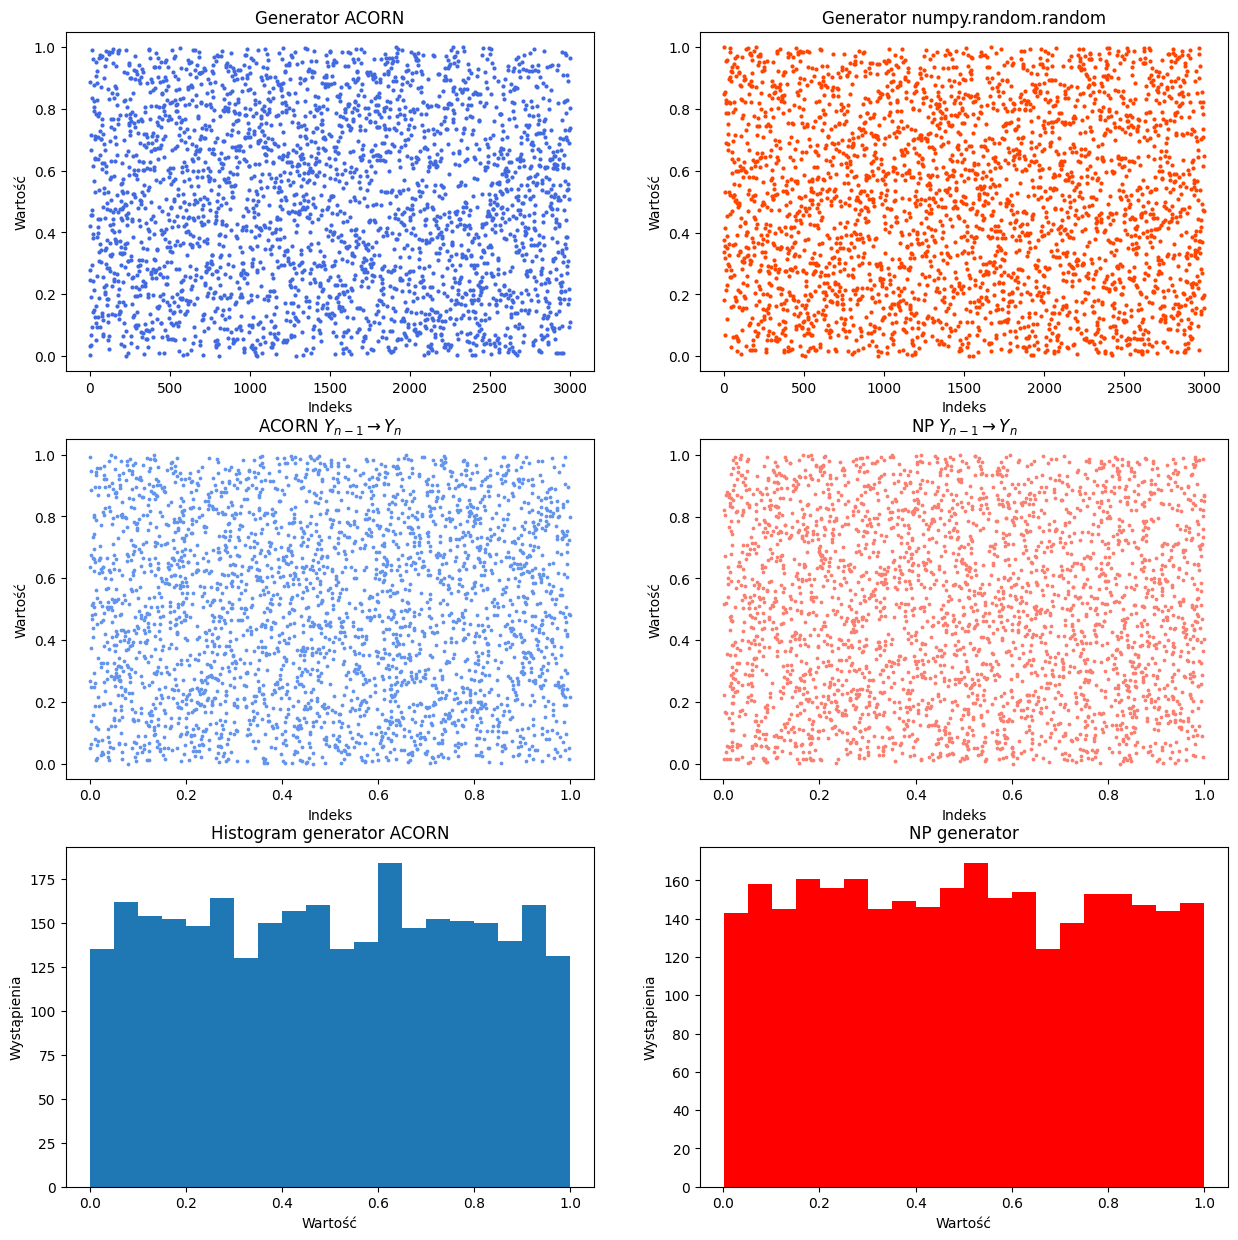

In [8]:

plt.figure(figsize=(15, 15))


Yk = ACORN(N, k, M, Lag)
Y_np = np.random.random(N+1)
plt.subplot(3, 2, 1)
plt.plot(Yk,'o',markersize=2,color="royalblue")
plt.title('Generator ACORN')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 3)
plt.scatter(Yk[:-1],Yk[1:],s=3,color="cornflowerblue")
plt.title('ACORN $Y_{n-1} \\rightarrow Y_n$')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 5)
plt.hist(Yk,bins=20)
plt.title('Histogram generator ACORN')
plt.xlabel('Wartość')
plt.ylabel('Wystąpienia')

plt.subplot(3, 2, 2)
plt.plot(Y_np,'o',markersize=2,color="orangered")
plt.title('Generator numpy.random.random')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 4)
plt.scatter(Y_np[:-1],Y_np[1:],s=3,color="salmon")
plt.title('NP $Y_{n-1} \\rightarrow Y_n$')
plt.xlabel('Indeks')
plt.ylabel('Wartość')

plt.subplot(3, 2, 6)
plt.hist(Y_np,bins=20,color="red")
plt.title('NP generator')
plt.xlabel('Wartość')
plt.ylabel('Wystąpienia')
plt.show()

Jak widać na załączonych odpowiadających sobie wykresach algorytm ACORN przejawia cechy ciągu zmiennych losowych $IID$ z rozkładu jednostajnego $U(0,1)$, zaimplementowanego przy pomocy funkcji `numpy.random.random` w Pythonie. Nie sposób nie zauważyć rozproszenia, jakim cechują się dwa wykresy na samej górze oraz bardzo podobnym przy okazji dwóch środkowych. Możemy na tej podstawie wyciągnąć wnioski, że generator metodą ACORN faktycznie ma cechy $IID$ (o czym śwaidczy niezależność jednej zmiennej losowej od drugiej, po sobie następujących) rozkładu jednostajnego $U(0,1)$ (jako że nie ma żadnych 'skupisk' podobnych wartości, które są równomiernie rozłożone po całej planszy). 

Analiza dolnych histogramów, w których wystąpienia plasują się dla każdej z wartości na zbliżonym do siebie pułapie, potwierdza cechę jednostajności rozkładu wygenerowanych zmiennych losowych obiema metodami.

Teraz przejdziemy do analizy czasów generowania ciągów pseudolosowych obiema metodami.

In [9]:
def ACORN_czas(N: int, k: int, M: int, Lag: int) -> float:
    """
    Funckja zwraca czas trwania algorytmu ACORN

    Parametry
    N (int): liczba liczb pseudolosowych do zwrócenia
    k (int): liczba "dodatnich wartości" rzędów (k=0 pominięte)
    M (int): liczbak względem której działa cały algorytm 
    Lag (int): ominięte wyrazy z k-tego rzędu

    Zwraca:
    (float): czas trwania

    """
    start_acorn = time.time()
    ACORN(N, k, M, Lag)
    end_acorn = time.time()
    return end_acorn-start_acorn

def NP_czas(N: int) -> float:
    """
    Funckja zwracjąca czas trwania algorytmu ACORN

    Parametry:
    N (int): liczba liczb pseudolosowych do zwrócenia

    Zwraca:
    (float): czas trwania
    
    """
    start_np = time.time()
    np.random.random(N+1)
    end_np = time.time()
    return end_np-start_np

czas_acorn = 0
czas_np=0
for tim in range(50):
    czas_acorn+=ACORN_czas(N, k, M, Lag)
    czas_np += NP_czas(N)


print(f"Czas ACORN: {czas_acorn/50} sekundy")
print(f"Czas numpy: {czas_np/50} sekundy")


Czas ACORN: 0.03701095581054688 sekundy
Czas numpy: 1.8911361694335936e-05 sekundy


Jak widać czas generacji metodą zaimplementowaną przy okazji tego zadania jest znacznie dłuższy niż tego przy pomocy wbudowanej paczki `numpy` (rzędu $10^3$).

Dla wnikliwszej analizy dokonamy pomiarów dla różnych długości ciągów $N$.

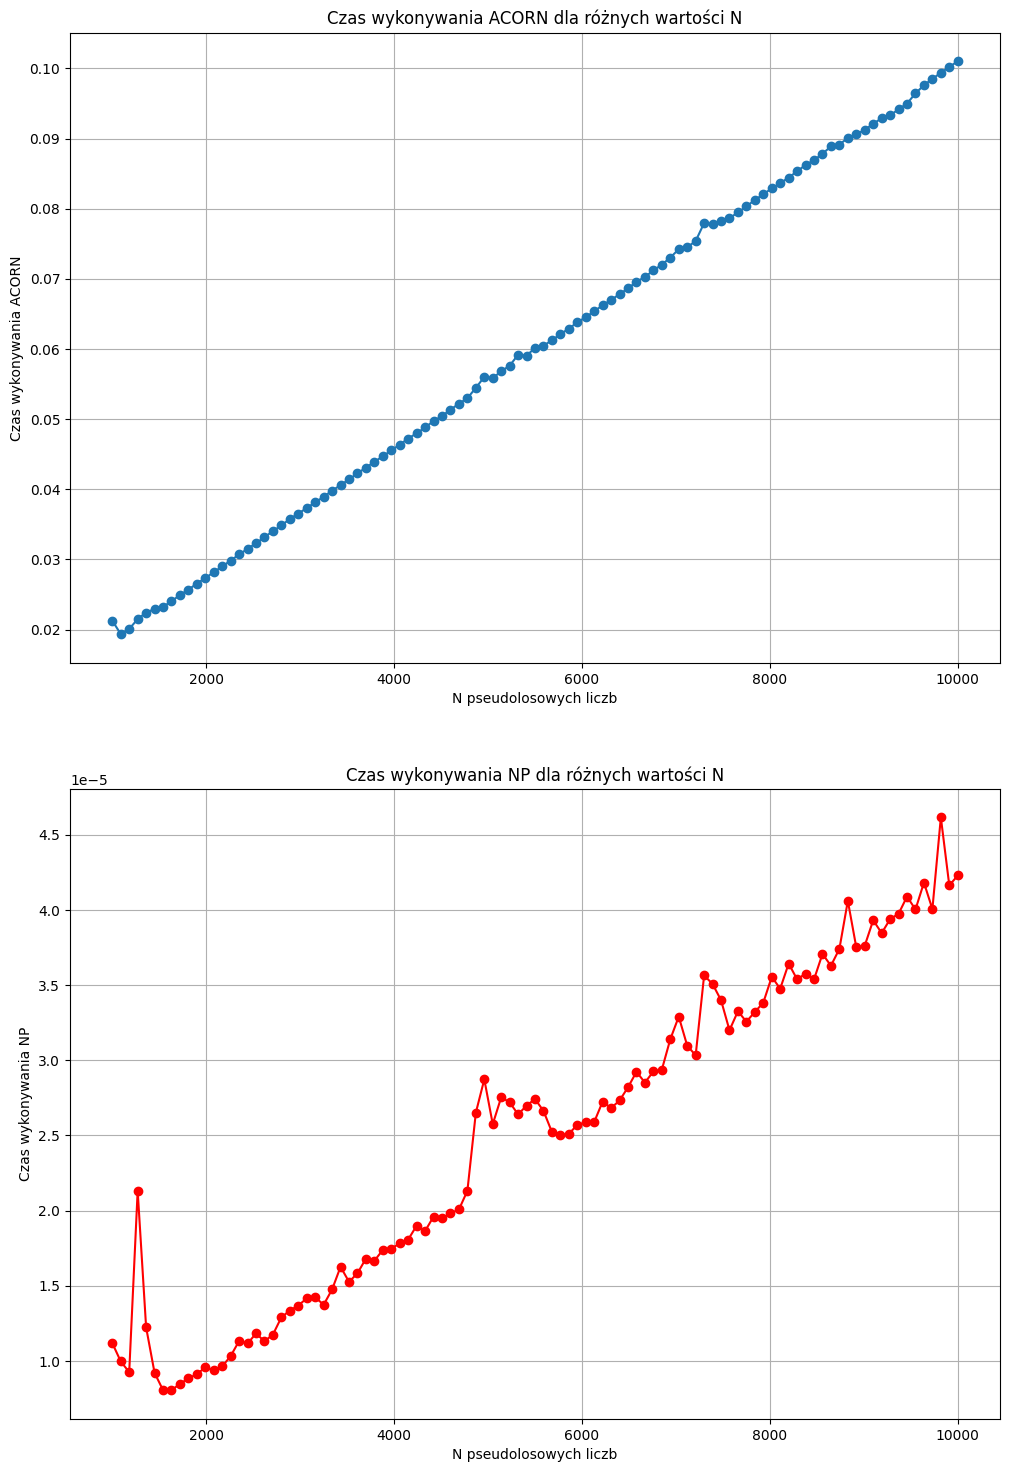

In [12]:
przedzial = 101
N2= np.linspace(1000, 10000,przedzial)

#listy dla przechowania wyników czasów
ACORN_czasy=np.zeros(przedzial)
NP_czasy=np.zeros(przedzial)
przedzialy = 0
for ns in N2:
    CZAS_ACORN = 0
    CZAS_NP = 0
    for tim in range(10):
        CZAS_ACORN+=ACORN_czas(int(ns), k, M, Lag)
        CZAS_NP += NP_czas(int(ns))
    ACORN_czasy[przedzialy] = CZAS_ACORN/10
    NP_czasy[przedzialy] = CZAS_NP/10
    przedzialy+=1

plt.figure(figsize=(12, 18))

plt.subplot(2, 1, 1)
plt.plot(N2, ACORN_czasy, 'o-')
plt.xlabel('N pseudolosowych liczb')
plt.ylabel('Czas wykonywania ACORN')
plt.title('Czas wykonywania ACORN dla różnych wartości N')
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(N2, NP_czasy, 'o-', color='red')
plt.xlabel('N pseudolosowych liczb')
plt.ylabel('Czas wykonywania NP')
plt.title('Czas wykonywania NP dla różnych wartości N')
plt.grid()

Jak można zauważyć, czas wykonania generacji metodą ACORN cechuje się coraz dłuższym czasem generacji dla zwiększających się wartości $N$, lecz warto zwrócić uwagę na ciekawą zależność liniową, według której zachowaują się kolejne czasy. Występują pojedyncze skoki i odchylenia od trendu, wynikające z niewielkiej liczby przeprowadzonych 'dla upewnienia się' testów (jedynie 10 dla każdej wartości) oraz błędów statystycznych w postaci obciążenia pamięci komputera w trakcie wykonywania symulacji. 

Choć generator `numpy` również cechuje się pewną liniowością, jego czasy wykonania znacznie różnią się od tych zaprezentowanych na wykresie dla metody ACORN. Ponownie różnice pomiędzy nimi mierzone są w tysiąc razy większych odstępach, co dla komputerów nie jest już wartością do pominięcia. 

Należy także odnotować, że generator ACORN uzyskuje 5 razy dłuższe czasy dla ostatniej generacji w porównaniu z pierwszą, podczas gdy dla takiej samej zależności `numpy` zwraca jedynie 4-krotnie większe wyniki. 

Dobitnie to potwierdza, że `numpy` jest o wiele bardziej wydajnym algorytmem niż zaimplementowany przez Wikramaratnę dodatni kongruentny sposób na generację liczb pseudolosowych. Niemniej jest on z pewnością o wiele bardziej działający na wyobraźnię matematyczną, ale chyba będzie dalej tkwił w cieniu kuzyna o nazwie `numpy.random.random`.